<a href="https://colab.research.google.com/github/Sailinon/practicum-by-yandex/blob/main/SPB_estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apartment sales study

We have Yandex.Estate service data at our disposal - an archive of estate sales in Saint-Petersbourg and nearby towns for several years. We need to learn to define market value of the apartments. We need to define the parameters. This will help to build an automated system: this system will track the anomalies and fraud. 

For each aoartment for sale we have two types of data. First one is provided by the users, second is gained automatically based on cartographic data. E.g. distance to the city center, airport, nearest park and pond. 

## Studying data from the source file

In [155]:
import numpy as np

In [156]:
!gdown --id 1IP1-Xk-gljtfZCMaA-tCzMNq6gQ4lb0S

Downloading...
From: https://drive.google.com/uc?id=1IP1-Xk-gljtfZCMaA-tCzMNq6gQ4lb0S
To: /content/real_estate_data.csv
100% 3.21M/3.21M [00:00<00:00, 204MB/s]


In [157]:
import pandas as pd
df = pd.read_csv('/content/real_estate_data.csv', sep = '\t')

In [158]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,...,25.000,NaN,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,...,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,NaN,5.000,34.300,4,NaN,...,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,NaN,14.000,NaN,9,NaN,...,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,...,41.000,NaN,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.000,133.810,2017-03-21T00:00:00,3,3.700,5.000,73.300,3,NaN,...,13.830,NaN,Санкт-Петербург,24665.000,4232.000,1.000,796.000,3.000,381.000,NaN
23695,14,3100000.000,59.000,2018-01-15T00:00:00,3,NaN,5.000,38.000,4,NaN,...,8.500,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.000
23696,18,2500000.000,56.700,2018-02-11T00:00:00,2,NaN,3.000,29.700,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.000,76.750,2017-03-28T00:00:00,2,3.000,17.000,NaN,12,NaN,...,23.300,2.000,Санкт-Петербург,39140.000,10364.000,2.000,173.000,3.000,196.000,602.000


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

We've detected gaps in the following columns:
ceiling_height
floors_total
living_area
is_apartment
kitchen_area
balcony
locality_name
airports_nearest
cityCenters_nearest
parks_around3000
parks_nearest
ponds_around3000
ponds_nearest
days_exposition

In [160]:
df.duplicated().sum()

0

In [161]:
for column in df:
    print (column)
    try:
        print ('min:', df[column].min(), 'max:', df[column].max())
    except:
        print ('- -')
    print (df[column].unique())

total_images
min: 0 max: 50
[20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
last_price
min: 12190.0 max: 763000000.0
[13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]
total_area
min: 12.0 max: 900.0
[108.    40.4   56.   ...  66.86 133.81  76.75]
first_day_exposition
min: 2014-11-27T00:00:00 max: 2019-05-03T00:00:00
['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-09-12T00:00:00' '2015-07-19T00:00:00']
rooms
min: 0 max: 19
[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]
ceiling_height
min: 1.0 max: 100.0
[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.

What can we pay attention to:  
For some apartments room number is 0.  
Ceiling height starts from 1 meter, and max height of 100 meters doesn't look realistic as well. For other values like 26 or 32 - it is possible that fractional part wasn't separated properly (2.6 и 3.2).   
Values in living_area start from 2 meters and reachs as much as 112 meters - possibly there is again a mistake with fractional part.  




In [162]:
for column in df:
    print(column,'\n', df[column].value_counts())

total_images 
 10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
32       4
28       4
50       3
29       3
27       2
30       2
35       2
31       2
42       1
25       1
39       1
37       1
Name: total_images, dtype: int64
last_price 
 4500000.000     342
3500000.000     291
4300000.000     260
4000000.000     260
4200000.000     259
               ... 
12890000.000      1
29375000.000      1
7545600.000       1
5205000.000       1
11475000.000      1
Name: last_price, Length: 2978, dtype: int64
total_area 
 45.000     419
42.000     383
60.000     347
31.000     346
44.000     345
          ... 
184.400      1
55.640       1
56.160       1
109.100      1
76.750       1
Name: total_area, Length: 2182, dtype: int64
first_day_exposition 
 2018-02-01

In [163]:
df.sort_values('last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.000,109.000,2019-03-20T00:00:00,2,2.750,25.000,32.000,25,NaN,...,40.500,NaN,Санкт-Петербург,36421.000,9176.000,1.000,805.000,0.000,NaN,8.000
17456,7,430000.000,30.400,2019-04-22T00:00:00,1,NaN,2.000,16.000,1,NaN,...,6.000,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000.000,54.000,2018-06-26T00:00:00,2,NaN,3.000,NaN,3,NaN,...,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.000
16274,18,440000.000,40.000,2018-07-10T00:00:00,1,NaN,5.000,NaN,1,NaN,...,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.000
17676,0,450000.000,36.500,2018-02-01T00:00:00,1,NaN,5.000,17.300,4,NaN,...,8.500,1.000,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15651,20,300000000.000,618.000,2017-12-18T00:00:00,7,3.400,7.000,258.000,5,NaN,...,70.000,NaN,Санкт-Петербург,32440.000,5297.000,0.000,NaN,2.000,198.000,111.000
1436,19,330000000.000,190.000,2018-04-04T00:00:00,3,3.500,7.000,95.000,5,NaN,...,40.000,NaN,Санкт-Петербург,23011.000,1197.000,3.000,519.000,3.000,285.000,233.000
14706,15,401300000.000,401.000,2016-02-20T00:00:00,5,NaN,9.000,204.000,9,False,...,24.000,3.000,Санкт-Петербург,21912.000,2389.000,1.000,545.000,1.000,478.000,393.000
19540,8,420000000.000,900.000,2017-12-06T00:00:00,12,2.800,25.000,409.700,25,NaN,...,112.000,NaN,Санкт-Петербург,30706.000,7877.000,0.000,NaN,2.000,318.000,106.000


There is one line with anomally low price - we can delete it. 

In [164]:
df.sort_values(['total_area'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19904,4,2400000.000,12.000,2017-07-19T00:00:00,1,2.550,5.000,10.000,2,NaN,...,NaN,NaN,Санкт-Петербург,21314.000,964.000,1.000,886.000,2.000,45.000,200.000
17961,3,1400000.000,13.000,2017-12-03T00:00:00,1,2.600,9.000,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,14350.000,15945.000,0.000,NaN,1.000,185.000,410.000
19546,3,1850000.000,13.000,2019-03-11T00:00:00,1,3.400,5.000,NaN,2,False,...,NaN,NaN,Санкт-Петербург,24915.000,5483.000,1.000,644.000,0.000,NaN,24.000
19807,0,3800000.000,13.000,2018-07-04T00:00:00,1,NaN,5.000,10.000,3,NaN,...,NaN,NaN,Санкт-Петербург,21302.000,1242.000,1.000,592.000,3.000,27.000,9.000
19558,2,1686000.000,13.200,2018-12-17T00:00:00,1,NaN,5.000,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,19891.000,4165.000,1.000,361.000,1.000,155.000,19.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5358,20,65000000.000,590.000,2019-02-14T00:00:00,15,3.500,6.000,409.000,3,NaN,...,100.000,NaN,Санкт-Петербург,24447.000,4666.000,1.000,767.000,0.000,NaN,14.000
15651,20,300000000.000,618.000,2017-12-18T00:00:00,7,3.400,7.000,258.000,5,NaN,...,70.000,NaN,Санкт-Петербург,32440.000,5297.000,0.000,NaN,2.000,198.000,111.000
3117,19,140000000.000,631.000,2019-03-30T00:00:00,7,NaN,5.000,NaN,5,NaN,...,60.000,NaN,Санкт-Петербург,25707.000,4972.000,0.000,NaN,2.000,210.000,NaN
12859,20,140000000.000,631.200,2019-04-09T00:00:00,7,3.900,4.000,322.300,4,NaN,...,19.500,1.000,Санкт-Петербург,25707.000,4972.000,0.000,NaN,2.000,210.000,NaN


Total area data looks good. 

In [165]:
df[df['rooms']==0]['rooms'].count()

197

197 objects have 0 rooms. Let's check what those objects are. 

In [166]:
#df[df['rooms']==0].sort_values('total_area')
df[(df['rooms']==0) & (df['studio']==True)].sort_values('total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8886,10,2450000.000,15.500,2018-08-22T00:00:00,0,NaN,5.000,10.000,2,NaN,...,NaN,NaN,Санкт-Петербург,24326.000,4589.000,0.000,NaN,1.000,446.000,27.000
716,5,1500000.000,17.000,2017-06-07T00:00:00,0,2.700,9.000,12.000,1,NaN,...,NaN,0.000,посёлок Шушары,18654.000,29846.000,0.000,NaN,0.000,NaN,40.000
12996,8,1900000.000,18.000,2019-01-25T00:00:00,0,2.600,5.000,16.000,3,NaN,...,NaN,NaN,Санкт-Петербург,19573.000,15772.000,2.000,149.000,2.000,496.000,10.000
8755,1,1350000.000,18.800,2017-11-22T00:00:00,0,2.750,19.000,15.800,1,NaN,...,NaN,NaN,Санкт-Петербург,37636.000,14479.000,0.000,NaN,1.000,1127.000,128.000
9817,8,2190000.000,19.000,2018-10-12T00:00:00,0,3.500,5.000,15.000,1,NaN,...,NaN,NaN,Санкт-Петербург,29561.000,8264.000,2.000,383.000,1.000,781.000,89.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10008,20,5050000.000,44.200,2017-09-14T00:00:00,0,2.700,9.000,32.200,1,NaN,...,NaN,NaN,Санкт-Петербург,24329.000,5955.000,0.000,NaN,2.000,520.000,69.000
13613,16,8100000.000,58.400,2019-04-26T00:00:00,0,3.300,7.000,33.000,6,NaN,...,NaN,NaN,Санкт-Петербург,14509.000,8288.000,0.000,NaN,0.000,NaN,NaN
21227,0,8200000.000,71.000,2017-07-21T00:00:00,0,5.800,5.000,68.000,5,NaN,...,NaN,0.000,Санкт-Петербург,20170.000,1261.000,2.000,295.000,3.000,366.000,30.000
3458,6,7400000.000,73.600,2017-05-18T00:00:00,0,NaN,3.000,50.000,1,NaN,...,NaN,0.000,Санкт-Петербург,26581.000,6085.000,0.000,NaN,1.000,348.000,60.000


Mostly those are small spaces which probably have one room/studios.  
The object which stands out is the one with 371 sq m of square, and price of 71000000 rubles. 

### Conclusion

There are gaps in multiple columns, which we will need to process. 
Besides there are some not typical data, which will need correction or removal. 
What we should pay attention to:  
Min last_price value is 12190.0 rubles - this line can be deleted. 
For some apartments room number is 0.
Ceiling height starts from 1 meter, and max height of 100 meters doesn't look realistic as well. For other values like 26 or 32 - it is possible that fractional part wasn't separated properly (2.6 и 3.2).
Values in living_area start from 2 meters - possibly there is a mistake  in the data. 

## Data preprocessing

### Processing gaps

 Let's deal with gaps
- ceiling_height
- floors_total
+ living_area
+ is_apartment
+ kitchen_area
+ balcony
locality_name
airports_nearest
cityCenters_nearest
+ parks_around3000
parks_nearest
+ ponds_around3000
ponds_nearest
days_exposition

Gaps in  ceiling_height и floors_total are hard to fill with any realistic data. Let's deal with living_area.

In [167]:
df[df['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,NaN,14.000,NaN,9,NaN,...,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
7,5,7915000.000,71.600,2019-04-18T00:00:00,2,NaN,24.000,NaN,22,NaN,...,18.900,2.000,Санкт-Петербург,23982.000,11634.000,0.000,NaN,0.000,NaN,NaN
30,12,2200000.000,32.800,2018-02-19T00:00:00,1,NaN,9.000,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.000
37,10,1990000.000,45.800,2017-10-28T00:00:00,2,2.500,5.000,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.000
44,13,5350000.000,40.000,2018-11-18T00:00:00,1,NaN,22.000,NaN,3,NaN,...,NaN,1.000,Санкт-Петербург,30471.000,11603.000,1.000,620.000,1.000,1152.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.000,80.300,2018-07-03T00:00:00,3,2.700,12.000,NaN,5,NaN,...,NaN,NaN,Колпино,27933.000,33719.000,0.000,NaN,2.000,562.000,60.000
23663,12,6400000.000,88.000,2018-01-12T00:00:00,4,2.550,10.000,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.000,13943.000,0.000,NaN,2.000,844.000,59.000
23670,9,2450000.000,45.600,2018-02-08T00:00:00,1,2.800,9.000,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.000
23679,0,2500000.000,35.000,2017-12-08T00:00:00,1,NaN,9.000,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.000


For 1903 objects living_area is not provided.  
Plan is the following: calculate the typical ratio of living area to the total area, fill in the gaps by multiplying the total area by the resulting coefficient. On a separate note, we pay attention to studio apartments and apartments with an open plan - they probably have a different ratio of total living space.

In [168]:
df['livin_total_ratio'] = df['living_area'] / df['total_area']

In [169]:
livin_total_ratio_studio = df.loc[(df['studio']==True) | (df['open_plan']==True), 'livin_total_ratio'].median()
livin_total_ratio = df['livin_total_ratio'].median()
df.loc[(df['studio']==True) | (df['open_plan']==True),'living_area'] = df.loc[(df['studio']==True) | (df['open_plan']==True),'living_area'].fillna((df['total_area']*livin_total_ratio_studio).round(decimals = 2))

In [170]:
df['living_area'] = df['living_area'].fillna((df['total_area']*livin_total_ratio).round(decimals = 2))

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [172]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,livin_total_ratio
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,...,NaN,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN,0.472
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,...,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000,0.460
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,NaN,5.000,34.300,4,NaN,...,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000,0.612
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,NaN,14.000,90.290,9,NaN,...,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000,NaN
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,...,NaN,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000,0.320
5,10,2890000.000,30.400,2018-09-10T00:00:00,1,NaN,12.000,14.400,5,NaN,...,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.000,0.474
6,6,3700000.000,37.300,2017-11-02T00:00:00,1,NaN,26.000,10.600,6,NaN,...,1.000,посёлок Парголово,52996.000,19143.000,0.000,NaN,0.000,NaN,155.000,0.284
7,5,7915000.000,71.600,2019-04-18T00:00:00,2,NaN,24.000,40.660,22,NaN,...,2.000,Санкт-Петербург,23982.000,11634.000,0.000,NaN,0.000,NaN,NaN,NaN
8,20,2900000.000,33.160,2018-05-23T00:00:00,1,NaN,27.000,15.430,26,NaN,...,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.000,0.465
9,18,5400000.000,61.000,2017-02-26T00:00:00,3,2.500,9.000,43.600,7,NaN,...,2.000,Санкт-Петербург,50898.000,15008.000,0.000,NaN,0.000,NaN,289.000,0.715


Gaps in living_area have been filled.

Similarly, let's fill in the gaps in the kitchen_area

In [173]:
df.loc[df['kitchen_area'].isna(), :'kitchen_area']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,NaN,14.000,90.290,9,NaN,False,False,NaN
30,12,2200000.000,32.800,2018-02-19T00:00:00,1,NaN,9.000,18.630,2,NaN,False,False,NaN
37,10,1990000.000,45.800,2017-10-28T00:00:00,2,2.500,5.000,26.010,1,NaN,False,False,NaN
44,13,5350000.000,40.000,2018-11-18T00:00:00,1,NaN,22.000,22.710,3,NaN,False,False,NaN
59,15,6300000.000,46.500,2017-03-06T00:00:00,1,NaN,13.000,26.410,13,NaN,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.000,40.500,2016-09-08T00:00:00,1,2.560,18.000,19.600,10,False,False,False,NaN
23663,12,6400000.000,88.000,2018-01-12T00:00:00,4,2.550,10.000,49.970,1,NaN,False,False,NaN
23670,9,2450000.000,45.600,2018-02-08T00:00:00,1,2.800,9.000,25.890,2,NaN,False,False,NaN
23679,0,2500000.000,35.000,2017-12-08T00:00:00,1,NaN,9.000,19.880,4,NaN,False,False,NaN


For studios and open-plan apartments, fill the kitchen area with 0.

In [174]:
df.loc[(df['open_plan'] == True) | (df['studio']==True), 'kitchen_area'] = df.loc[(df['open_plan'] == True) | (df['studio']==True), 'kitchen_area'].fillna(0)

In [175]:
df.query('open_plan == True or studio == True')['kitchen_area']

144     0.000
349     0.000
440     0.000
508     0.000
608     0.000
         ... 
23210   0.000
23442   0.000
23554   0.000
23592   0.000
23637   0.000
Name: kitchen_area, Length: 216, dtype: float64

In [176]:
df['kitchen_total_ratio'] = df['kitchen_area'] / df['total_area']
kitchen_total_ratio = df['kitchen_total_ratio'].median()
df['kitchen_area'] = df['kitchen_area'].fillna((df['total_area']*kitchen_total_ratio).round(decimals = 2))

In [177]:
df.loc[:, :'kitchen_area']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,False,False,25.000
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,False,False,11.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,NaN,5.000,34.300,4,NaN,False,False,8.300
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,NaN,14.000,90.290,9,NaN,False,False,27.260
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,False,False,41.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.000,133.810,2017-03-21T00:00:00,3,3.700,5.000,73.300,3,NaN,False,False,13.830
23695,14,3100000.000,59.000,2018-01-15T00:00:00,3,NaN,5.000,38.000,4,NaN,False,False,8.500
23696,18,2500000.000,56.700,2018-02-11T00:00:00,2,NaN,3.000,29.700,1,NaN,False,False,9.720
23697,13,11475000.000,76.750,2017-03-28T00:00:00,2,3.000,17.000,43.580,12,NaN,False,False,23.300


In [178]:
df['kitchen_area'].isna().sum()

0

The gaps in kitchen_area are filled with typical values.

Let's move on to is_apartment. It can be assumed that the absence of a value is equivalent to "not an apartment" - fill in the gaps with the False value.

In [179]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [180]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [181]:
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Done, instead of nan in the is_apartment column, the values ​​are now False.

Fill in the gaps in the balcony column, similar to is_apartment. No value - no balconies.

In [182]:
df['balcony'].value_counts()

1.000    4195
0.000    3758
2.000    3659
5.000     304
4.000     183
3.000      81
Name: balcony, dtype: int64

In [183]:
df['balcony'] = df['balcony'].fillna(0)

In [184]:
df['balcony'].value_counts()

0.000    15277
1.000     4195
2.000     3659
5.000      304
4.000      183
3.000       81
Name: balcony, dtype: int64

In [185]:
df['balcony'].isna().sum()

0

Where there was no data on balconies - now there are no balconies.

Fill in passes for nearby parks and water bodies. If there is no data, we will assume that there is no park / pond within a radius of 3 km.

In [186]:
df['parks_around3000'].value_counts()

0.000    10106
1.000     5681
2.000     1747
3.000      647
Name: parks_around3000, dtype: int64

In [187]:
df['ponds_around3000'].value_counts()

0.000    9071
1.000    5717
2.000    1892
3.000    1501
Name: ponds_around3000, dtype: int64

In [188]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [189]:
df['parks_around3000'].value_counts()

0.000    15624
1.000     5681
2.000     1747
3.000      647
Name: parks_around3000, dtype: int64

In [190]:
df['parks_around3000'].isna().sum()

0

In [191]:
df['ponds_around3000'].value_counts()

0.000    14589
1.000     5717
2.000     1892
3.000     1501
Name: ponds_around3000, dtype: int64

In [192]:
df['ponds_around3000'].isna().sum()

0

Gaps for ponds and parks are filled.

In [193]:
#5717 + 1892 + 1501

In [194]:
len(df.query('ponds_around3000>0'))

9110

9110 - the number of records that have water bodies within a radius of 3000 m is the same as the number of records for which the distance to the nearest body of water is indicated. This means that the distance to the nearest body of water is filled only if there is a body of water within a radius of 3000 m. There is no point in filling gaps in ponds_nearest in any way.

In [195]:
#5681 + 1747 + 647
len(df.query('parks_around3000>0'))

8075

Parks within 3 km were found for 8075 entries. The distance to the nearest park is filled for 8079 records. For 4 entries, the distance to the park is filled, even though the park is not within a 3 km radius. As you can see in the table below, the distance there is slightly more than 3 km - probably a feature of the unloading. The situation is generally similar to ponds_nearest.
We will not fill in gaps in parks_nearest in any way.

In [196]:
df[df['parks_nearest'] > 3000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,livin_total_ratio,kitchen_total_ratio
1590,3,7500000.000,70.000,2017-07-11T00:00:00,2,NaN,18.000,37.000,13,False,...,Санкт-Петербург,14878.000,9791.000,0.000,3064.000,1.000,264.000,4.000,0.529,0.143
10959,9,3000000.000,31.100,2017-03-21T00:00:00,1,NaN,5.000,17.700,2,False,...,Санкт-Петербург,14821.000,9734.000,0.000,3190.000,1.000,431.000,234.000,0.569,0.177
19208,17,14950000.000,187.000,2017-10-12T00:00:00,5,3.000,2.000,80.000,2,False,...,Санкт-Петербург,36805.000,8656.000,0.000,3013.000,3.000,537.000,49.000,0.428,0.091
19430,9,3900000.000,30.500,2018-02-22T00:00:00,1,2.600,5.000,16.500,1,False,...,Санкт-Петербург,14821.000,9734.000,0.000,3190.000,1.000,431.000,176.000,0.541,0.180


There are still gaps in the following columns:
- locality_name
- airports_nearest
- cityCenters_nearest
- parks_nearest
- ponds_nearest
- days_exposition   
We will not calculate the location.
The distance to the airport and the city center is also nowhere to take.
we will not know the distance to the nearest park and reservoir.
The number of days of publication cannot be calculated from the available data - it is possible that such entries were still published at the time the data was uploaded.

### Changing data types

Let's change the data type from float64 to int in the following columns:
balcony
parks_around3000
ponds_around3000

In the first_day_exposition column, we will convert the text values to the date and time format.

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [198]:
df[['balcony',
'parks_around3000',
'ponds_around3000']] = df[['balcony',
'parks_around3000',
'ponds_around3000']].astype(int)

In [199]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],
format='%Y-%m-%dT%H:%M:%S')

Convert the balconies column to bool

In [200]:
df['balcony'] = df['balcony'].astype('bool')

Let's replace the type in floors_total

In [201]:
df['floors_total'] = df['floors_total'].fillna(-999)

In [202]:
df['floors_total'] = df['floors_total'].astype('int')

In [203]:

df['floors_total'] = df['floors_total'].replace(-999, np.nan)

In [204]:
df.query('floors_total == -999')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,livin_total_ratio,kitchen_total_ratio


In [205]:
df['days_exposition'] = df['days_exposition'].fillna(-999)

In [206]:
df['days_exposition'] = df['days_exposition'].astype('int')

In [207]:
df['days_exposition'] = df['days_exposition'].replace(-999, np.nan)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [209]:
df['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

### Processing the values

Replace zero number of rooms

In [210]:
df.groupby('rooms')['total_area'].describe()

,count,mean,std,min,25%,50%,75%,max
rooms,,,,,,,,
0,197.000,29.280,25.855,15.500,24.050,26.050,28.400,371.000
1,8047.000,37.645,9.338,12.000,32.500,36.560,41.000,494.100
2,7940.000,55.855,13.196,20.000,46.000,53.000,62.000,196.000
3,5814.000,77.765,23.269,40.100,62.000,73.000,87.000,363.100
4,1180.000,107.611,44.519,42.000,77.800,99.300,125.325,500.000
5,326.000,161.475,69.314,40.000,117.475,146.450,183.750,507.000
6,105.000,201.538,77.811,87.000,152.000,184.300,236.000,500.000
7,59.000,265.325,130.124,100.600,181.700,214.000,347.300,631.200
8,12.000,259.233,69.903,150.000,224.325,235.700,323.975,373.100


We will assume that from 12 to 40 meters - 1-room flat, from 40 to 62 - 2-room flat, from 62 to 100 - 3-room flat. Well, we will give our record holder with 371 meters 19 rooms.
We will not change the number of rooms for studio apartments.

In [211]:
df.loc[(df['rooms'] == 0) & (12<df['total_area'])  & (df['total_area']<=40) & (df['studio']== False), 'rooms'] =1
df.loc[(df['rooms'] == 0) & (40<df['total_area'])  & (df['total_area']<=62) & (df['studio']== False), 'rooms'] =2
df.loc[(df['rooms'] == 0) & (62<df['total_area'])  & (df['total_area']<=100) & (df['studio']== False), 'rooms'] =3
df.loc[(df['rooms'] == 0) & (df['total_area']>300), 'rooms'] =19

In [212]:
df.query('rooms == 0 and 12<total_area<=40')['rooms']

144      0
440      0
608      0
697      0
716      0
        ..
22867    0
22877    0
23210    0
23554    0
23637    0
Name: rooms, Length: 131, dtype: int64

In [213]:
df['rooms'].value_counts()

1     8104
2     7941
3     5814
4     1180
5      326
0      138
6      105
7       59
8       12
9        8
10       3
19       2
11       2
14       2
15       1
16       1
12       1
Name: rooms, dtype: int64

Only studio apartments remained with 0 rooms.

Fix the values in the ceiling_height column

In [214]:
df['ceiling_height'].value_counts().sort_values()
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Let's look at inadequately high ceilings.

In [215]:
df.query('ceiling_height > 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,livin_total_ratio,kitchen_total_ratio
355,17,3600000.000,55.200,2018-07-12,2,25.000,5.000,32.000,2,False,...,Гатчина,NaN,NaN,0,NaN,0,NaN,259.000,0.580,NaN
3148,14,2900000.000,75.000,2018-11-12,3,32.000,3.000,53.000,2,False,...,Волхов,NaN,NaN,0,NaN,0,NaN,NaN,0.707,0.107
4643,0,4300000.000,45.000,2018-02-01,2,25.000,9.000,30.000,2,False,...,Санкт-Петербург,12016.000,13256.000,1,658.000,1,331.000,181.000,0.667,0.156
4876,7,3000000.000,25.000,2017-09-27,1,27.000,25.000,17.000,17,False,...,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,28.000,0.680,0.000
5076,0,3850000.000,30.500,2018-10-03,1,24.000,5.000,19.500,1,True,...,Санкт-Петербург,29686.000,8389.000,3,397.000,1,578.000,7.000,0.639,0.180
5246,0,2500000.000,54.000,2017-10-13,2,27.000,5.000,30.000,3,False,...,деревня Мины,NaN,NaN,0,NaN,0,NaN,540.000,0.556,0.167
5669,4,4400000.000,50.000,2017-08-08,2,26.000,9.000,21.300,3,False,...,Санкт-Петербург,28981.000,10912.000,1,305.000,0,NaN,267.000,0.426,0.140
5807,17,8150000.000,80.000,2019-01-09,2,27.000,36.000,41.000,13,False,...,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,38.000,0.512,0.150
6246,6,3300000.000,44.400,2019-03-25,2,25.000,5.000,31.300,5,False,...,Кронштадт,68923.000,50649.000,1,417.000,2,73.000,NaN,0.705,0.128
9379,5,3950000.000,42.000,2017-03-26,3,25.000,5.000,30.000,2,False,...,Санкт-Петербург,11647.000,13581.000,0,NaN,0,NaN,NaN,0.714,0.124


Let's say there are penthouses with a height of 10.3 meters. Anything more will be considered a user error - divide by 10

In [216]:
df.loc[df['ceiling_height'] > 10.3, 'ceiling_height'] = df['ceiling_height']/10

Google suggests that the minimum ceiling height in living quarters is 2.4 meters. Let's see which objects have less height.

In [217]:
df.query('ceiling_height >= 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,livin_total_ratio,kitchen_total_ratio
22309,20,5300000.000,45.000,2017-09-30,1,10.300,16.000,15.500,15,False,...,Санкт-Петербург,36353.000,11936.000,2,440.000,2,450.000,136.000,0.344,NaN
22869,0,15000000.000,25.000,2018-07-25,1,10.000,5.000,14.000,5,True,...,Санкт-Петербург,34963.000,8283.000,1,223.000,3,30.000,19.000,0.560,0.440


In [218]:
df[df['ceiling_height']<2.4]['ceiling_height'].value_counts()

2.000    12
2.300     4
2.340     1
1.200     1
2.200     1
1.400     1
1.750     1
2.250     1
2.260     1
1.000     1
Name: ceiling_height, dtype: int64

In [219]:
df[df['ceiling_height']<2.4]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,livin_total_ratio,kitchen_total_ratio
227,13,2200000.000,47.000,2018-01-12,3,2.340,5.000,26.690,1,False,...,посёлок Новый Свет,NaN,NaN,0,NaN,0,NaN,45.000,NaN,NaN
552,11,2999000.000,33.500,2017-03-30,1,2.000,15.000,17.500,6,False,...,Санкт-Петербург,33972.000,11746.000,1,520.000,1,949.000,270.000,0.522,0.194
1582,4,4100000.000,45.600,2016-01-13,2,2.300,9.000,28.400,8,False,...,Санкт-Петербург,49152.000,14977.000,1,489.000,1,525.000,329.000,0.623,0.154
2572,4,2400000.000,62.000,2018-12-27,3,2.000,5.000,40.000,4,False,...,Луга,NaN,NaN,0,NaN,0,NaN,NaN,0.645,0.097
4212,1,2120000.000,35.430,2017-12-18,1,2.000,18.000,16.600,9,False,...,Тосно,NaN,NaN,0,NaN,0,NaN,36.000,0.469,0.248
5498,17,2200000.000,56.000,2018-04-02,2,2.300,5.000,45.000,1,False,...,Сясьстрой,NaN,NaN,0,NaN,0,NaN,55.000,0.804,0.161
5712,5,1500000.000,42.800,2017-08-14,2,1.200,2.000,27.500,1,False,...,городской посёлок Мга,NaN,NaN,0,NaN,0,NaN,248.000,0.643,0.121
5850,9,1650000.000,35.500,2018-05-29,1,2.000,5.000,20.160,5,False,...,Луга,NaN,NaN,0,NaN,0,NaN,100.000,NaN,NaN
11352,4,3300000.000,36.000,2017-06-18,1,2.000,17.000,15.200,12,False,...,посёлок Металлострой,25268.000,26980.000,0,NaN,0,NaN,53.000,0.422,0.281
12755,2,1400000.000,22.500,2017-09-21,1,2.200,2.000,18.000,2,False,...,село Копорье,NaN,NaN,0,NaN,0,NaN,45.000,0.800,0.200


There are 21 objects in total, mostly in high-rise buildings. The users must have made a mistake when entering the data. We will replace it with 2.5 meters.

In [220]:
df.loc[df['ceiling_height']<2.4, 'ceiling_height'] = 2.5

In [221]:
df[df['ceiling_height']<2.4]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,livin_total_ratio,kitchen_total_ratio


Replacement completed successfully.

In [222]:
df.query('ceiling_height > 5')['ceiling_height'].value_counts()

8.000     3
5.300     2
5.200     1
5.600     1
8.300     1
5.500     1
6.000     1
5.800     1
10.300    1
10.000    1
Name: ceiling_height, dtype: int64

In [223]:
df['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,  3.16,
        3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,  2.79,
        2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,  2.4 ,
        3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  3.57,  2.48,
        2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,  3.75,  2.88,
        3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,  4.8 ,  4.5 ,
        4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,  8.  ,  3.26,
        3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,  3.22,  3.27,
        4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,  8.3 ,  2.98,
        2.86,  3.17,

Let's try to highlight records with inadequately small living space

In [224]:
df.query('living_area<7').sort_values(by=['total_area'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,livin_total_ratio,kitchen_total_ratio
17582,11,2680000.000,22.000,2018-08-11,0,NaN,25.000,5.000,8,False,...,Санкт-Петербург,22735.000,11618.000,1,835.000,1,652.000,70.000,0.227,0.000
21758,0,2330000.000,23.000,2018-01-01,0,NaN,24.000,2.000,22,False,...,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,66.000,0.087,0.000
16431,13,3799000.000,31.000,2018-04-12,1,2.600,5.000,6.000,1,False,...,Санкт-Петербург,32177.000,4826.000,1,430.000,0,NaN,168.000,0.194,0.548
19251,19,4050000.000,33.000,2018-10-15,1,2.500,22.000,6.500,21,False,...,Санкт-Петербург,9258.000,10592.000,1,458.000,0,NaN,44.000,0.197,0.545
3242,7,4440000.000,41.000,2017-07-02,1,NaN,17.000,3.000,17,False,...,Санкт-Петербург,19272.000,13073.000,0,NaN,0,NaN,216.000,0.073,0.268
13915,20,6350000.000,52.000,2018-02-06,2,3.000,6.000,2.000,2,False,...,Санкт-Петербург,32453.000,6521.000,0,NaN,1,1012.000,91.000,0.038,0.173
21943,15,6100000.000,77.600,2019-02-28,4,2.500,9.000,5.400,1,False,...,Санкт-Петербург,29338.000,11270.000,1,584.000,0,NaN,33.000,0.070,0.126
23574,14,64990000.000,139.000,2015-11-24,3,3.000,8.000,3.000,8,False,...,Санкт-Петербург,33255.000,5975.000,1,630.000,3,100.000,280.000,0.022,0.115


There were very few such objects (for apartments of a very small area, probably, a small living space is not a mistake). It is possible to neglect the correction of these records.

We also check that there are no apartments where the living area exceeds the total.

In [225]:
df.query('livin_total_ratio>1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,livin_total_ratio,kitchen_total_ratio


There are no such objects. 

Let's process the values of settlements: remove the type of settlement, replace the letter ё with e in the names.

To begin with, let's try to highlight the lemmas in order to understand what words are used to indicate the type of settlement

In [226]:
from pymystem3 import Mystem
m = Mystem() 

In [227]:
df['locality_name'] = df['locality_name'].fillna('неизвестно')

In [228]:
df['locality_name'] = df['locality_name'].replace(regex='ё', value = "е").str.strip() 

In [229]:
df.query('"Бугры" in locality_name')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,livin_total_ratio,kitchen_total_ratio


In [230]:
df['locality_name'].value_counts().head(60)

Санкт-Петербург                            15721
поселок Мурино                               556
поселок Шушары                               440
Всеволожск                                   398
Пушкин                                       369
Колпино                                      338
поселок Парголово                            327
Гатчина                                      307
деревня Кудрово                              299
Выборг                                       237
Петергоф                                     201
Сестрорецк                                   183
Красное Село                                 178
Кудрово                                      173
деревня Новое Девяткино                      144
Сертолово                                    142
Ломоносов                                    133
Кириши                                       125
поселок Бугры                                114
Сланцы                                       112
Волхов              

We will reunite Murino with the village of Murino, and Kudrovo with the village of Kudrovo

In [231]:
df.loc[df['locality_name']== "Мурино", 'locality_name'] = "поселок Мурино"
df.loc[df['locality_name']== "Кудрово", 'locality_name'] = "деревня Кудрово"

In [232]:
df['locality_name'].value_counts().head(15)

Санкт-Петербург            15721
поселок Мурино               590
деревня Кудрово              472
поселок Шушары               440
Всеволожск                   398
Пушкин                       369
Колпино                      338
поселок Парголово            327
Гатчина                      307
Выборг                       237
Петергоф                     201
Сестрорецк                   183
Красное Село                 178
деревня Новое Девяткино      144
Сертолово                    142
Name: locality_name, dtype: int64

### Conclusions
Filled in gaps in columns where appropriate and possible (living_area, is_apartment, kitchen_area, balcony, parks_around3000, ponds_around3000).  
Changed data types from real to integer to make it easier to work with data (balcony, parks_around3000, ponds_around3000). The ad placement date was changed to the date format - this way we can get separate parameters from it.  
Corrected the height of the ceilings, where it was apparently indicated incorrectly.  
The type of settlement was removed from the column with the names of the settlements, the "ё" was replaced with "e" so that it could be grouped by names.

## Calculations and adding results to the table

Add price per square meter to the table

In [233]:
df['meter_price'] = (df['last_price'] / df['total_area']).astype('int')

In [234]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,livin_total_ratio,kitchen_total_ratio,meter_price
0,20,13000000.000,108.000,2019-03-07,3,2.700,16.000,51.000,8,False,...,18863.000,16028.000,1,482.000,2,755.000,NaN,0.472,0.231,120370
1,7,3350000.000,40.400,2018-12-04,1,NaN,11.000,18.600,1,False,...,12817.000,18603.000,0,NaN,0,NaN,81.000,0.460,0.272,82920
2,10,5196000.000,56.000,2015-08-20,2,NaN,5.000,34.300,4,False,...,21741.000,13933.000,1,90.000,2,574.000,558.000,0.612,0.148,92785
3,0,64900000.000,159.000,2015-07-24,3,NaN,14.000,90.290,9,False,...,28098.000,6800.000,2,84.000,3,234.000,424.000,NaN,NaN,408176
4,2,10000000.000,100.000,2018-06-19,2,3.030,14.000,32.000,13,False,...,31856.000,8098.000,2,112.000,1,48.000,121.000,0.320,0.410,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.000,133.810,2017-03-21,3,3.700,5.000,73.300,3,False,...,24665.000,4232.000,1,796.000,3,381.000,NaN,0.548,0.103,72490
23695,14,3100000.000,59.000,2018-01-15,3,NaN,5.000,38.000,4,False,...,NaN,NaN,0,NaN,0,NaN,45.000,0.644,0.144,52542
23696,18,2500000.000,56.700,2018-02-11,2,NaN,3.000,29.700,1,False,...,NaN,NaN,0,NaN,0,NaN,NaN,0.524,NaN,44091
23697,13,11475000.000,76.750,2017-03-28,2,3.000,17.000,43.580,12,False,...,39140.000,10364.000,2,173.000,3,196.000,602.000,NaN,0.304,149511


Add the day of the week, month and year of publication of the announcement

In [235]:
df['first_day_exposition_day'] = pd.DatetimeIndex(df['first_day_exposition']).dayofweek
df['first_day_exposition_month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['first_day_exposition_year'] = pd.DatetimeIndex(df['first_day_exposition']).year 

In [236]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,livin_total_ratio,kitchen_total_ratio,meter_price,first_day_exposition_day,first_day_exposition_month,first_day_exposition_year
0,20,13000000.000,108.000,2019-03-07,3,2.700,16.000,51.000,8,False,...,482.000,2,755.000,NaN,0.472,0.231,120370,3,3,2019
1,7,3350000.000,40.400,2018-12-04,1,NaN,11.000,18.600,1,False,...,NaN,0,NaN,81.000,0.460,0.272,82920,1,12,2018
2,10,5196000.000,56.000,2015-08-20,2,NaN,5.000,34.300,4,False,...,90.000,2,574.000,558.000,0.612,0.148,92785,3,8,2015
3,0,64900000.000,159.000,2015-07-24,3,NaN,14.000,90.290,9,False,...,84.000,3,234.000,424.000,NaN,NaN,408176,4,7,2015
4,2,10000000.000,100.000,2018-06-19,2,3.030,14.000,32.000,13,False,...,112.000,1,48.000,121.000,0.320,0.410,100000,1,6,2018
5,10,2890000.000,30.400,2018-09-10,1,NaN,12.000,14.400,5,False,...,NaN,0,NaN,55.000,0.474,0.299,95065,0,9,2018
6,6,3700000.000,37.300,2017-11-02,1,NaN,26.000,10.600,6,False,...,NaN,0,NaN,155.000,0.284,0.386,99195,3,11,2017
7,5,7915000.000,71.600,2019-04-18,2,NaN,24.000,40.660,22,False,...,NaN,0,NaN,NaN,NaN,0.264,110544,3,4,2019
8,20,2900000.000,33.160,2018-05-23,1,NaN,27.000,15.430,26,False,...,NaN,0,NaN,189.000,0.465,0.266,87454,2,5,2018
9,18,5400000.000,61.000,2017-02-26,3,2.500,9.000,43.600,7,False,...,NaN,0,NaN,289.000,0.715,0.107,88524,6,2,2017


Add the floor of the apartment to the table; options - first, last, other. If the total number of floors in the line is not filled, and the floor is not the first - the apartment will fall into the "other" category.

In [237]:
df['floor_cat'] = df['floor']

def floor_cat(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
df['floor_cat'] = df.apply(floor_cat, axis = 1)

Check the results of category assignment

In [238]:
df['floor_cat'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_cat, dtype: int64

In [239]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,livin_total_ratio,kitchen_total_ratio,meter_price,first_day_exposition_day,first_day_exposition_month,first_day_exposition_year,floor_cat
0,20,13000000.000,108.000,2019-03-07,3,2.700,16.000,51.000,8,False,...,2,755.000,NaN,0.472,0.231,120370,3,3,2019,другой
1,7,3350000.000,40.400,2018-12-04,1,NaN,11.000,18.600,1,False,...,0,NaN,81.000,0.460,0.272,82920,1,12,2018,первый
2,10,5196000.000,56.000,2015-08-20,2,NaN,5.000,34.300,4,False,...,2,574.000,558.000,0.612,0.148,92785,3,8,2015,другой
3,0,64900000.000,159.000,2015-07-24,3,NaN,14.000,90.290,9,False,...,3,234.000,424.000,NaN,NaN,408176,4,7,2015,другой
4,2,10000000.000,100.000,2018-06-19,2,3.030,14.000,32.000,13,False,...,1,48.000,121.000,0.320,0.410,100000,1,6,2018,другой


In [240]:
df[df['floor_cat']=='последний'].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,livin_total_ratio,kitchen_total_ratio,meter_price,first_day_exposition_day,first_day_exposition_month,first_day_exposition_year,floor_cat
12,10,3890000.000,54.000,2016-06-30,2,NaN,5.000,30.000,5,False,...,0,NaN,90.000,0.556,0.167,72037,3,6,2016,последний
13,20,3550000.000,42.800,2017-07-01,2,2.560,5.000,27.000,5,False,...,3,298.000,366.000,0.631,0.121,82943,5,7,2017,последний
23,11,2950000.000,32.000,2016-10-29,1,2.600,9.000,17.700,9,False,...,1,190.000,615.000,0.553,0.191,92187,5,10,2016,последний
36,13,3790000.000,45.000,2017-01-25,2,NaN,9.000,27.000,9,False,...,0,NaN,139.000,0.600,0.140,84222,2,1,2017,последний
43,13,9330000.000,48.000,2017-01-10,2,3.000,4.000,28.000,4,False,...,1,492.000,763.000,0.583,0.156,194375,1,1,2017,последний


We have already added columns with the ratio of living and total area, as well as the ratio of kitchen area to total area, to the table at the stage of filling in the missing values. These are the livin_total_ratio and kitchen_total_ratio columns, respectively.

### Conclusion
We have successfully calculated and added the following data to the table:
- price per square meter;
- day of the week, month and year of publication of the announcement;
- floor of the apartment; options - first, last, other;
- the ratio of residential and total area, as well as the ratio of kitchen area to total.

## Exploratory data analysis

###  We study the parameters: area, price, number of rooms, ceiling height. Histograms

We will study the following parameters: area, price, number of rooms, ceiling height.
Let's make histograms for each parameter.

In [241]:
import matplotlib.pyplot as plt

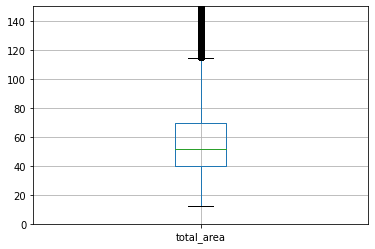

In [242]:
plt.ylim(0,150)
df.boxplot(column='total_area', figsize = (7,20))
plt.show()

In [243]:
df['total_area'].describe()

count   23699.000
mean       60.349
std        35.654
min        12.000
25%        40.000
50%        52.000
75%        69.900
max       900.000
Name: total_area, dtype: float64

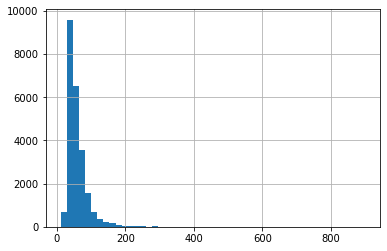

In [244]:
df['total_area'].hist(bins=50)
plt.show()

Due to the presence of several "palaces" with a very large area, it is difficult to say anything from the histogram. Let's limit the range, display objects with an area of up to 120 meters (judging by the "box with a mustache" emissions still go further), and add more bins for clarity.

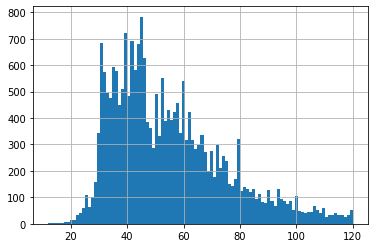

In [245]:
df['total_area'].hist(bins=100, range=(12, 120))
plt.show()

The histogram for apartment areas looks plausible. Peaks around 30 and 45 meters. This roughly corresponds to the area of one- and two-room apartments in soviet-era flats.
We will make sure by counting the values ​​(see below) - most of all apartments with an area of ​​44, 42, 45 meters.

In [246]:
df['total_area'].value_counts().sort_values()

76.750       1
38.350       1
22.400       1
275.000      1
184.300      1
          ... 
44.000     345
31.000     346
60.000     347
42.000     383
45.000     419
Name: total_area, Length: 2182, dtype: int64

Let's build a histogram by price

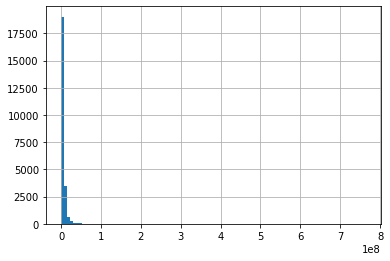

In [247]:
df['last_price'].hist(bins=100)
plt.show()

Palaces are not cheap, and because of this, nothing is clear on our histogram.

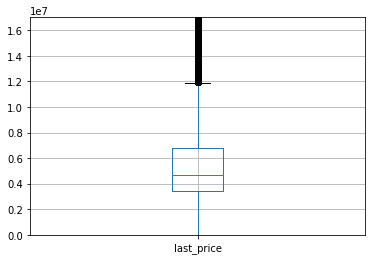

In [248]:
plt.ylim(0,17000000)
df.boxplot(column='last_price', figsize = (7,10))
plt.show()

In [249]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df['last_price'].describe()

count       23699.000
mean      6541548.772
std      10887013.268
min         12190.000
25%       3400000.000
50%       4650000.000
75%       6800000.000
max     763000000.000
Name: last_price, dtype: float64

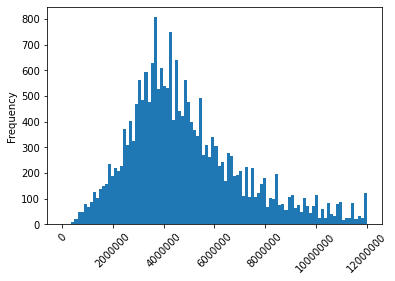

In [250]:

df['last_price'].plot(kind = 'hist', bins=100, range=(0, 12000000), rot = 45)
plt.ticklabel_format(axis="x", style="plain")
plt.show()


Now it is clear that most of the values fall in the range up to 12 million rubles, and the peak is in the region of 4 million.
Emissions are not observed, it looks correct.

Let's build a histogram by the number of rooms

In [251]:
df['rooms'].describe()

count   23699.000
mean        2.074
std         1.080
min         0.000
25%         1.000
50%         2.000
75%         3.000
max        19.000
Name: rooms, dtype: float64

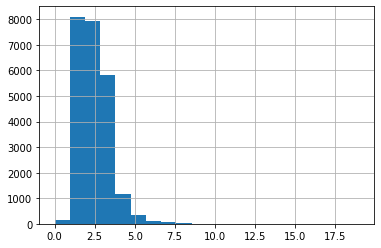

In [252]:
df['rooms'].hist(bins=20)
plt.show()

Everything looks correct, most of the apartments are 1-, 2-, 3-room

In [253]:
df['rooms'].value_counts()

1     8104
2     7941
3     5814
4     1180
5      326
0      138
6      105
7       59
8       12
9        8
10       3
19       2
11       2
14       2
15       1
16       1
12       1
Name: rooms, dtype: int64

Let's build a histogram for the height of the ceilings.

In [254]:
df['ceiling_height'].describe()

count   14504.000
mean        2.730
std         0.304
min         2.400
25%         2.510
50%         2.650
75%         2.800
max        10.300
Name: ceiling_height, dtype: float64

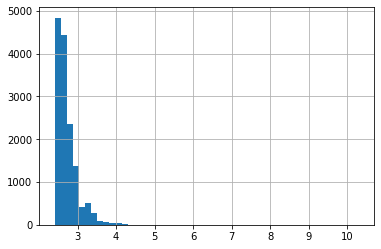

In [255]:
df['ceiling_height'].hist(bins=50)
plt.show()

Most values fit up to 4.5 meters. Let's limit the range.

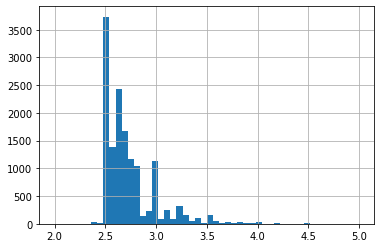

In [256]:
df['ceiling_height'].hist(bins=50, range = (2,5))
plt.show()

Looks believable. Peaks are expected in the region of 2.5 and 2.7 meters - the most common options for ceiling heights.

#### Conclusions 
We've built histograms for area, price, number of rooms, ceiling heights. Judging by the diagrams, the distribution of all values looks realistic. 

### Studying the time of sale of the apartment

Let's build a histogram for the time of sale of an apartment

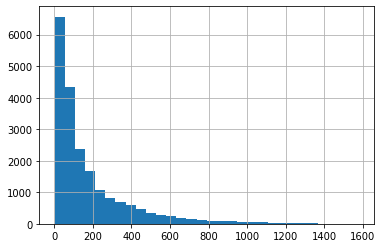

In [257]:
df['days_exposition'].hist(bins = 30)
plt.show()

Let's take a closer look at the range from 0 to 200

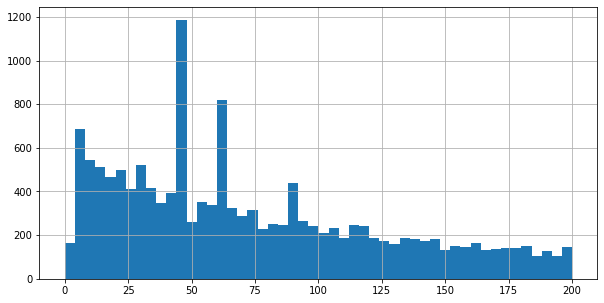

In [258]:
df['days_exposition'].hist(bins = 50, range = (0,200), figsize = (10,5))
plt.show()

In [259]:
df['days_exposition'].value_counts().sort_values().tail(15)

18.000    129
11.000    135
44.000    138
20.000    139
8.000     139
9.000     143
14.000    148
5.000     152
3.000     158
4.000     176
90.000    204
30.000    208
7.000     234
60.000    538
45.000    880
Name: days_exposition, dtype: int64

Clear peaks at 60 and 45 days, also among the most frequent values are 30 and 90. Perhaps these are standard ad placement times, or the values were rounded. Also in the top 7 and 14 days - also looks like a kind of standardization.

Finding the mean and median

In [260]:
df['days_exposition'].describe()

count   20518.000
mean      180.889
std       219.728
min         1.000
25%        45.000
50%        95.000
75%       232.000
max      1580.000
Name: days_exposition, dtype: float64

The mean is almost twice the median. All because of ads that have been posted for 4 or more years.
Let's judge by quartiles: if the deal was closed in less than 45 days - sales went fast, if more than 230 days - slowly.
The usual term for the sale of an apartment is 95 days.

Let's assume that if the ad was placed during the standard period, then this means that the sale did not take place (it was not necessary to remove the ad from publication earlier). Let's try to study the time of sale of an apartment without "standard" values (7,14,30,45,60,90 days).

In [261]:
days_exposition_false = [7, 14, 30, 45, 60, 90]
df.query('days_exposition not in @days_exposition_false')['days_exposition'].describe()

count   18306.000
mean      197.273
std       227.082
min         1.000
25%        46.000
50%       115.000
75%       261.000
max      1580.000
Name: days_exposition, dtype: float64

In [262]:
df.query('days_exposition not in @days_exposition_false')['days_exposition']

0           NaN
1        81.000
2       558.000
3       424.000
4       121.000
          ...  
23693   239.000
23694       NaN
23696       NaN
23697   602.000
23698       NaN
Name: days_exposition, Length: 21487, dtype: float64

Not all values (7,14,30,45,60,90 days) are not excluded from the selection

In [263]:
df[df['days_exposition'] == 45]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,livin_total_ratio,kitchen_total_ratio,meter_price,first_day_exposition_day,first_day_exposition_month,first_day_exposition_year,floor_cat
78,9,4350000.000,37.000,2018-02-22,1,NaN,19.000,18.000,6,False,...,0,NaN,45.000,0.486,0.289,117567,3,2,2018,другой
89,9,2500000.000,63.000,2018-10-25,3,2.500,5.000,43.000,4,False,...,0,NaN,45.000,0.683,0.143,39682,3,10,2018,другой
110,6,3850000.000,72.300,2017-09-29,2,NaN,3.000,27.400,2,False,...,0,NaN,45.000,0.379,0.326,53250,4,9,2017,другой
153,12,4350000.000,55.000,2017-05-21,2,2.570,9.000,31.200,2,False,...,0,NaN,45.000,0.567,0.151,79090,6,5,2017,другой
158,15,3100000.000,47.300,2017-11-07,2,NaN,5.000,27.500,2,False,...,0,NaN,45.000,0.581,0.180,65539,1,11,2017,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23601,10,2900000.000,43.400,2018-01-11,2,NaN,5.000,24.650,1,False,...,2,397.000,45.000,NaN,NaN,66820,3,1,2018,первый
23613,4,3950000.000,52.000,2018-03-04,3,NaN,5.000,29.530,2,False,...,0,NaN,45.000,NaN,NaN,75961,6,3,2018,другой
23670,9,2450000.000,45.600,2018-02-08,1,2.800,9.000,25.890,2,False,...,0,NaN,45.000,NaN,NaN,53728,3,2,2018,другой
23679,0,2500000.000,35.000,2017-12-08,1,NaN,9.000,19.880,4,False,...,0,NaN,45.000,NaN,NaN,71428,4,12,2017,другой


A slice by one of the values (45) can not be built. Let's try to convert the column values to int

In [264]:
df['days_exposition'] = df['days_exposition'].fillna(-1)
df['days_exposition']

0        -1.000
1        81.000
2       558.000
3       424.000
4       121.000
          ...  
23694    -1.000
23695    45.000
23696    -1.000
23697   602.000
23698    -1.000
Name: days_exposition, Length: 23699, dtype: float64

In [265]:
df['days_exposition'] = df['days_exposition'].astype('int')

In [266]:
import numpy as np
df['days_exposition'] = df['days_exposition'].replace(-1, np.nan)

In [267]:
df.query('days_exposition not in @days_exposition_false')['days_exposition']

0           NaN
1        81.000
2       558.000
3       424.000
4       121.000
          ...  
23693   239.000
23694       NaN
23696       NaN
23697   602.000
23698       NaN
Name: days_exposition, Length: 21487, dtype: float64

The values were converted to int, the gaps were returned to their place. Now let's study the cutoff indicators again.

In [268]:
df.query('days_exposition not in @days_exposition_false')['days_exposition'].describe()

count   18306.000
mean      197.273
std       227.082
min         1.000
25%        46.000
50%       115.000
75%       261.000
max      1580.000
Name: days_exposition, dtype: float64

The median time to sell an apartment is now 115 days (was 95 days).
A trade can be considered fast if it took less than 46 days, and long if it took more than 261 days (previously it was 45 and 230 days, respectively).

### We study what factors most affect the cost of an apartment

Now we'll study the impact of the area of ​​the apartment on the price.

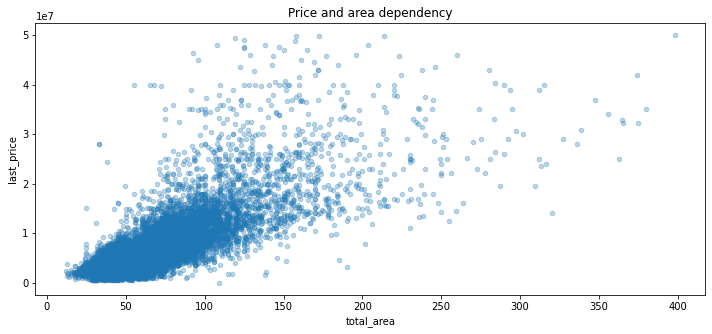

In [269]:
df.query('total_area < 400 and last_price < 50000000').plot(x='total_area', y='last_price', kind='scatter', alpha=0.3, figsize = (12,5), title = 'Price and area dependency')

In [270]:
print(df['total_area'].corr(df['last_price']))

0.6536750579657244


Predictably, the larger the area, the higher the price.

Let's see how the price depends on the number of rooms.

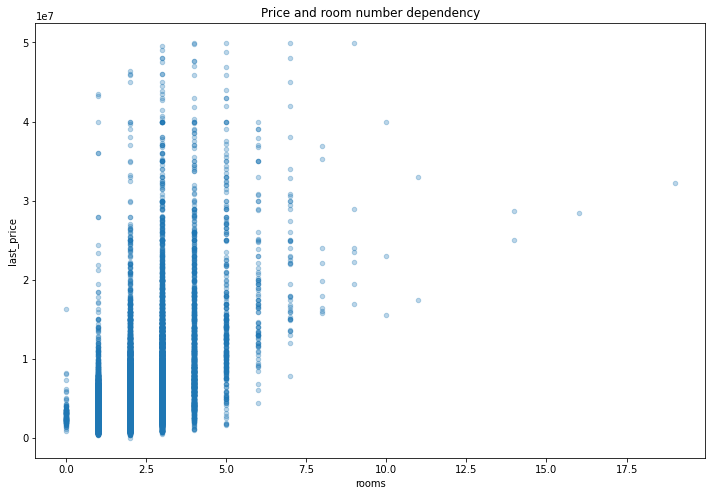

In [271]:
df.query('last_price<50000000').plot(x='rooms', y='last_price', kind='scatter', alpha=0.3, figsize = (12,8),title = 'Price and room number dependency')


In [272]:
print(df['rooms'].corr(df['last_price']))

0.3662869698945045


The price of apartments increases with the number of rooms, but the correlation is not very strong.

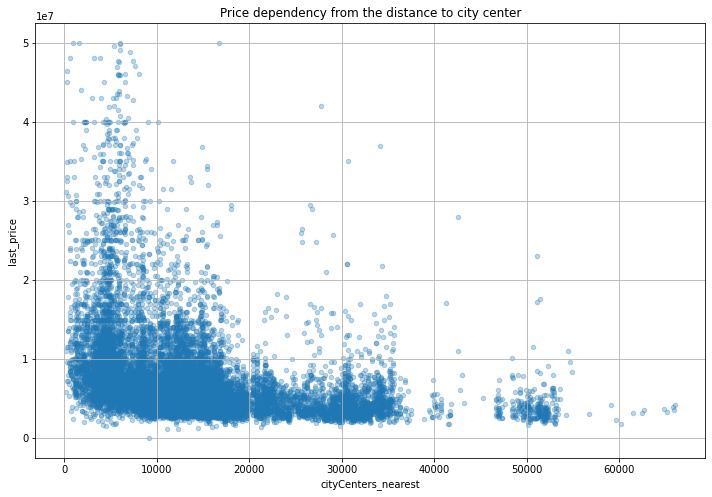

In [273]:
df.query('last_price<50000000').plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3, figsize = (12,8),grid = True ,title = 'Price dependency from the distance to city center')


In [274]:
df['cityCenters_nearest'].corr(df['last_price'])

-0.20674734874298376

In [275]:
df.query('cityCenters_nearest<20000')['cityCenters_nearest'].corr(df['last_price'])

-0.2704395586947481

The closer to the center, the lower the prices. The correlation is not very strong. Proximity to the center practically ceases to affect prices after 20 km.

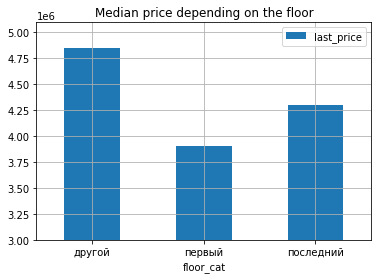

In [276]:
df.pivot_table(index = 'floor_cat', values = 'last_price', aggfunc = 'median').plot(
    kind = 'bar', grid = True, rot = 0, ylim = 3000000,
    title = 'Median price depending on the floor')
plt.show()

The cheapest apartments are on the first floor, on the top floor they are somewhat more expensive, the most expensive ones are on the "other". Apartments on the ground floor are usually about 20% cheaper than those located on the "other".

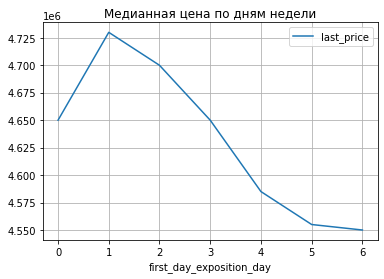

In [277]:
df.pivot_table(index = 'first_day_exposition_day', values = 'last_price', aggfunc = 'median').plot(grid=True, title = 'Медианная цена по дням недели')
plt.show()

The closer to the weekend an ad is placed, the lower the median price. Maybe real estate agents place ads with expensive objects, so this happens on weekdays?

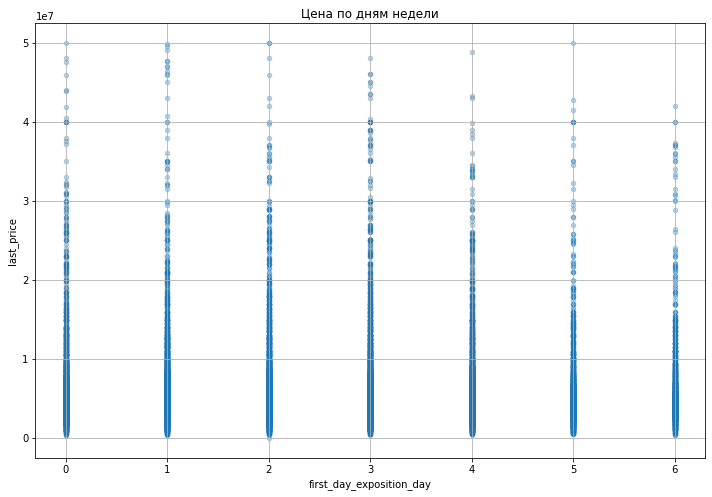

In [278]:
df.query('last_price<50000000').plot(
    x='first_day_exposition_day', y='last_price', kind='scatter', alpha=0.3, figsize = (12,8),grid = True,title = 'Цена по дням недели')
plt.show()

Let's look at the dependence of the price on the month of the ad.

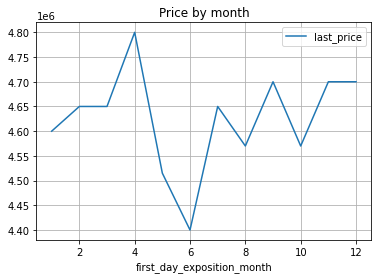

In [279]:
df.pivot_table(index = 'first_day_exposition_month', values = 'last_price', aggfunc = 'median').plot(
    grid = True,title = 'Price by month')
plt.show()

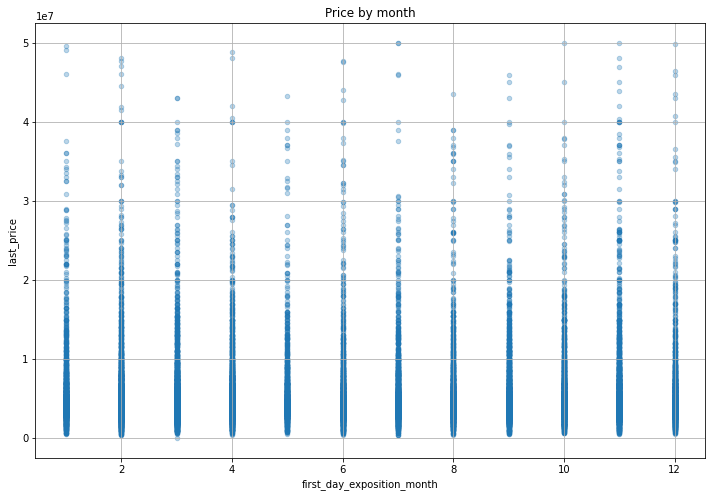

In [280]:
df.query('last_price<50000000').plot(
    x='first_day_exposition_month', y='last_price', kind='scatter', alpha=0.3, 
    figsize = (12,8),grid = True,title = 'Price by month')
plt.show()

According to the graph of the change in the median price, it can be seen that three months are allocated. At the same time, for April ads, prices are maximum, but in May and June - minimum.
Probably the decline is due to the holiday season and the lull in the market.

Let's look at the dependence of the price on the year of the announcement.

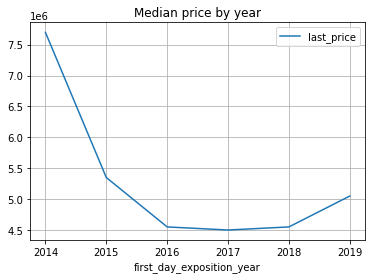

In [281]:
df.pivot_table(index = 'first_day_exposition_year', values = 'last_price', aggfunc = 'median').plot(
    grid = True,title = 'Median price by year')
plt.show()

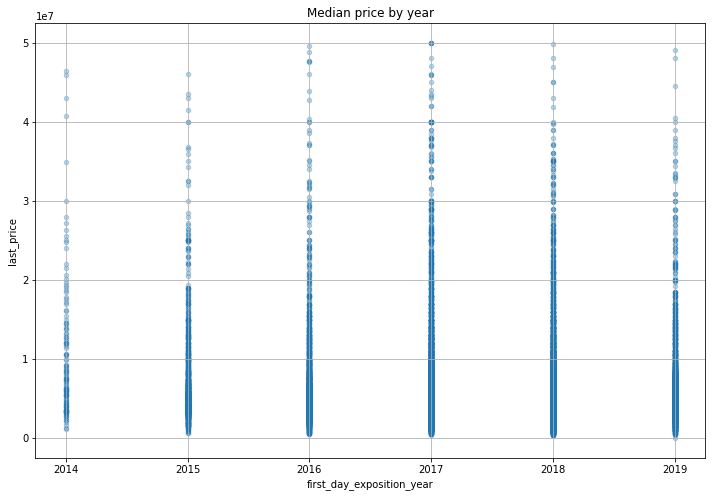

In [282]:
df.query('last_price<50000000').plot(
    x='first_day_exposition_year', y='last_price', kind='scatter', 
    alpha=0.3, figsize = (12,8),grid = True,title = 'Median price by year')
plt.show()

The median price after 2014 fell immediately by a third, and then a little more. A clear impact of the economic crisis of 2014-15.

#### Conclusion
The greatest influence on the price is the area of ​​the apartment and the floor (the apartments are more expensive, located not on the first and not on the last floor). The number of rooms and the distance to the center affect the price moderately.
The price of objects placed on weekdays is noticeably higher than the price of objects placed on weekends. In May and June there is a decline in prices, while the peak is in April. After 2014, real estate prices fell sharply and remained at approximately the same level for the next 5 years.

### Studying 10 towns with the largest number of ads

We will select 10 settlements with the largest number of ads

In [283]:
top10 = df.groupby('locality_name')['locality_name'].count().sort_values(ascending = False).head(10)

In [284]:
top10

locality_name
Санкт-Петербург      15721
поселок Мурино         590
деревня Кудрово        472
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
Выборг                 237
Name: locality_name, dtype: int64

Get a list of names of settlements from the top 10.

In [285]:
top10_index = top10.index

In [286]:
top10_index

Index(['Санкт-Петербург', 'поселок Мурино', 'деревня Кудрово',
       'поселок Шушары', 'Всеволожск', 'Пушкин', 'Колпино',
       'поселок Парголово', 'Гатчина', 'Выборг'],
      dtype='object', name='locality_name')

Let's double-check that the selection according to the received list gives the same number of announcements.

In [287]:
df.query('locality_name in @top10_index')['locality_name'].value_counts()

Санкт-Петербург      15721
поселок Мурино         590
деревня Кудрово        472
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
Выборг                 237
Name: locality_name, dtype: int64

Let's make sure that in our sample in all rows there is data for calculating the price per square meter (price and total area).

In [288]:
df.query('locality_name in @top10_index').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19199 entries, 0 to 23697
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_images                19199 non-null  int64         
 1   last_price                  19199 non-null  float64       
 2   total_area                  19199 non-null  float64       
 3   first_day_exposition        19199 non-null  datetime64[ns]
 4   rooms                       19199 non-null  int64         
 5   ceiling_height              11837 non-null  float64       
 6   floors_total                19122 non-null  float64       
 7   living_area                 19199 non-null  float64       
 8   floor                       19199 non-null  int64         
 9   is_apartment                19199 non-null  bool          
 10  studio                      19199 non-null  bool          
 11  open_plan                   19199 non-null  bool      

All data is there. Let's calculate the price per square meter. First, we save only the data we need in the new dataframe.

In [289]:
Meter_price = df.query('locality_name in @top10_index')[['locality_name', 'last_price', 'total_area']]

In [290]:
Meter_price

,locality_name,last_price,total_area
0,Санкт-Петербург,13000000.000,108.000
1,поселок Шушары,3350000.000,40.400
2,Санкт-Петербург,5196000.000,56.000
3,Санкт-Петербург,64900000.000,159.000
4,Санкт-Петербург,10000000.000,100.000
...,...,...,...
23689,Санкт-Петербург,3550000.000,35.300
23690,Санкт-Петербург,5500000.000,52.000
23691,Санкт-Петербург,9470000.000,72.900
23694,Санкт-Петербург,9700000.000,133.810


Add a new column with the price per square meter

In [291]:
Meter_price['m2_price'] = Meter_price['last_price'] / Meter_price['total_area']

Let's create a table with averages.

In [292]:
Meter_price.groupby('locality_name').mean().sort_values(by = 'm2_price', ascending = False).reset_index()

,locality_name,last_price,total_area,m2_price
0,Санкт-Петербург,8062507.069,64.751,114849.009
1,Пушкин,6469035.946,61.553,103125.819
2,деревня Кудрово,4358688.051,46.395,95324.931
3,поселок Парголово,4488074.798,51.521,90175.913
4,поселок Мурино,3678462.203,44.099,86087.512
5,поселок Шушары,4108081.816,53.821,78677.364
6,Колпино,3964021.438,53.231,75424.579
7,Гатчина,3488336.678,50.943,68746.147
8,Всеволожск,3789067.751,56.022,68654.474
9,Выборг,3250983.122,56.150,58141.909


#### Conclusions
Of the 10 locations with the largest number of ads, the highest average price per square meter in St. Petersburg. The lowest is in Vyborg.

### Studying the offers of apartments in St. Petersburg

In [293]:
df.query('locality_name == "Санкт-Петербург"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15721 entries, 0 to 23697
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_images                15721 non-null  int64         
 1   last_price                  15721 non-null  float64       
 2   total_area                  15721 non-null  float64       
 3   first_day_exposition        15721 non-null  datetime64[ns]
 4   rooms                       15721 non-null  int64         
 5   ceiling_height              10104 non-null  float64       
 6   floors_total                15651 non-null  float64       
 7   living_area                 15721 non-null  float64       
 8   floor                       15721 non-null  int64         
 9   is_apartment                15721 non-null  bool          
 10  studio                      15721 non-null  bool          
 11  open_plan                   15721 non-null  bool      

Not all apartments in St. Petersburg indicate the distance to the center.
Let's add a column with the distance from the center in kilometers to the dataframe - we will select only those apartments for which the distance to the center is indicated.

In [294]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest']

In [295]:
df.loc[df['cityCenters_nearest'].notnull(),'cityCenters_nearest_km'] = (df['cityCenters_nearest_km']/1000).round(0)

In [296]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,livin_total_ratio,kitchen_total_ratio,meter_price,first_day_exposition_day,first_day_exposition_month,first_day_exposition_year,floor_cat,cityCenters_nearest_km
0,20,13000000.000,108.000,2019-03-07,3,2.700,16.000,51.000,8,False,...,755.000,NaN,0.472,0.231,120370,3,3,2019,другой,16.000
1,7,3350000.000,40.400,2018-12-04,1,NaN,11.000,18.600,1,False,...,NaN,81.000,0.460,0.272,82920,1,12,2018,первый,19.000
2,10,5196000.000,56.000,2015-08-20,2,NaN,5.000,34.300,4,False,...,574.000,558.000,0.612,0.148,92785,3,8,2015,другой,14.000
3,0,64900000.000,159.000,2015-07-24,3,NaN,14.000,90.290,9,False,...,234.000,424.000,NaN,NaN,408176,4,7,2015,другой,7.000
4,2,10000000.000,100.000,2018-06-19,2,3.030,14.000,32.000,13,False,...,48.000,121.000,0.320,0.410,100000,1,6,2018,другой,8.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.000,133.810,2017-03-21,3,3.700,5.000,73.300,3,False,...,381.000,NaN,0.548,0.103,72490,1,3,2017,другой,4.000
23695,14,3100000.000,59.000,2018-01-15,3,NaN,5.000,38.000,4,False,...,NaN,45.000,0.644,0.144,52542,0,1,2018,другой,NaN
23696,18,2500000.000,56.700,2018-02-11,2,NaN,3.000,29.700,1,False,...,NaN,NaN,0.524,NaN,44091,6,2,2018,первый,NaN
23697,13,11475000.000,76.750,2017-03-28,2,3.000,17.000,43.580,12,False,...,196.000,602.000,NaN,0.304,149511,1,3,2017,другой,10.000


In [312]:
spb_flats = df.query('locality_name == "Санкт-Петербург"  and cityCenters_nearest_km > 0').reset_index()

In [314]:
spb_flats

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_nearest,days_exposition,livin_total_ratio,kitchen_total_ratio,meter_price,first_day_exposition_day,first_day_exposition_month,first_day_exposition_year,floor_cat,cityCenters_nearest_km
0,0,20,13000000.000,108.000,2019-03-07,3,2.700,16.000,51.000,8,...,755.000,NaN,0.472,0.231,120370,3,3,2019,другой,16.000
1,2,10,5196000.000,56.000,2015-08-20,2,NaN,5.000,34.300,4,...,574.000,558.000,0.612,0.148,92785,3,8,2015,другой,14.000
2,3,0,64900000.000,159.000,2015-07-24,3,NaN,14.000,90.290,9,...,234.000,424.000,NaN,NaN,408176,4,7,2015,другой,7.000
3,4,2,10000000.000,100.000,2018-06-19,2,3.030,14.000,32.000,13,...,48.000,121.000,0.320,0.410,100000,1,6,2018,другой,8.000
4,7,5,7915000.000,71.600,2019-04-18,2,NaN,24.000,40.660,22,...,NaN,NaN,NaN,0.264,110544,3,4,2019,другой,12.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15628,23689,13,3550000.000,35.300,2018-02-28,1,2.860,15.000,16.300,4,...,652.000,29.000,0.462,0.258,100566,2,2,2018,другой,16.000
15629,23690,3,5500000.000,52.000,2018-07-19,2,NaN,5.000,31.000,2,...,NaN,15.000,0.596,0.115,105769,3,7,2018,другой,6.000
15630,23691,11,9470000.000,72.900,2016-10-13,2,2.750,25.000,40.300,7,...,806.000,519.000,0.553,0.145,129903,3,10,2016,другой,4.000
15631,23694,9,9700000.000,133.810,2017-03-21,3,3.700,5.000,73.300,3,...,381.000,NaN,0.548,0.103,72490,1,3,2017,другой,4.000


In [315]:
spb_flats['m2_price'] = spb_flats['last_price'] / spb_flats['total_area']

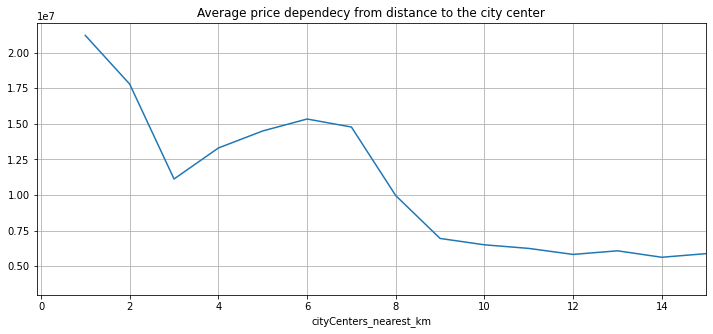

In [316]:
spb_flats.groupby('cityCenters_nearest_km')['last_price'].mean().plot(
    grid = True, figsize = (12,5), xlim = (-0.1,15),
    title = 'Average price dependecy from distance to the city center')
plt.show()

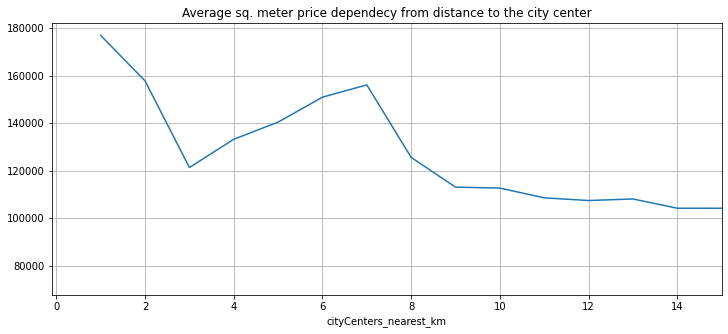

In [317]:
spb_flats.groupby('cityCenters_nearest_km')['m2_price'].mean().plot(
    grid = True, figsize = (12,5), xlim = (-0.1,15),
    title = 'Average sq. meter price dependecy from distance to the city center')
plt.show()

####  Conclusions
Prices go up sharply within a radius of 2 kilometers from the center of St. Petersburg. We will consider this the central zone.

### Let's study the segment of apartments in the center

Let's select in the dataframe apartments in St. Petersburg, within a radius of 2 km from the center.

In [320]:
center_flats = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km >0 and cityCenters_nearest_km<=2')

In [321]:
center_flats

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,livin_total_ratio,kitchen_total_ratio,meter_price,first_day_exposition_day,first_day_exposition_month,first_day_exposition_year,floor_cat,cityCenters_nearest_km
24,8,6500000.000,97.200,2015-10-31,2,NaN,3.000,46.500,1,False,...,124.000,265.000,0.478,0.202,66872,5,10,2015,первый,2.000
155,8,96000000.000,317.000,2017-07-07,4,3.500,3.000,183.000,3,False,...,366.000,62.000,0.577,NaN,302839,4,7,2017,последний,2.000
207,11,9000000.000,72.600,2018-09-08,2,2.900,5.000,43.200,4,False,...,485.000,NaN,0.595,0.157,123966,5,9,2018,другой,2.000
213,11,8700000.000,111.400,2016-10-10,4,3.100,4.000,73.200,2,False,...,55.000,791.000,0.657,0.127,78096,0,10,2016,другой,1.000
226,17,7950000.000,86.400,2019-04-24,4,NaN,3.000,52.700,1,False,...,NaN,NaN,0.610,0.147,92013,2,4,2019,первый,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23395,4,40000000.000,188.000,2017-05-29,6,NaN,6.000,109.510,4,False,...,62.000,30.000,0.583,0.166,212765,0,5,2017,другой,2.000
23399,16,15300000.000,97.000,2017-01-11,3,3.500,7.000,61.400,2,False,...,189.000,391.000,0.633,0.098,157731,2,1,2017,другой,1.000
23400,17,30000000.000,213.000,2017-09-28,7,3.400,5.000,151.400,5,False,...,30.000,299.000,0.711,0.145,140845,3,9,2017,последний,1.000
23602,0,8700000.000,73.000,2019-01-23,3,2.650,4.000,41.450,4,False,...,151.000,34.000,NaN,NaN,119178,2,1,2019,последний,2.000


Found 529 apartments.  
Let's build a histogram by area.

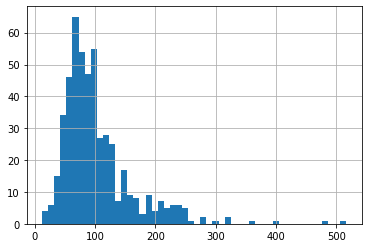

In [322]:
#df.query('total_area<500')['total_area'].hist(bins = 50)
center_flats['total_area'].hist(bins = 50)

plt.show()

In [323]:
center_flats['total_area'].describe()

count   502.000
mean    103.459
std      60.877
min      12.000
25%      65.675
50%      87.100
75%     120.575
max     517.000
Name: total_area, dtype: float64

The median area of an apartment for sale in the center of St. Petersburg is 90 meters. This is significantly more than the median area for all apartments (52 meters).

Let's look at the prices

In [324]:
center_flats['last_price'].describe()

count         502.000
mean     19095755.934
std      32596430.515
min       2100000.000
25%       7955000.000
50%      10500000.000
75%      16537500.000
max     401300000.000
Name: last_price, dtype: float64

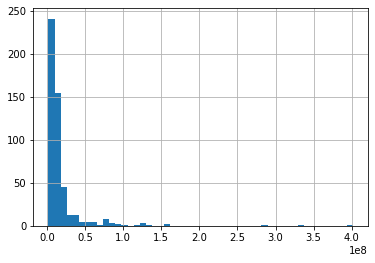

In [325]:
center_flats['last_price'].hist(bins = 50)

Let's limit the sample

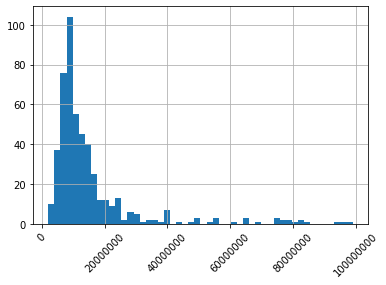

In [326]:
center_flats.query('last_price < (1*10**8)')['last_price'].hist(bins = 50, xrot = 45)
plt.ticklabel_format(axis="x", style="plain")
plt.show()

The median price of an apartment in the center of St. Petersburg is 10.7 million rubles. Everything looks correct on the chart, no unnatural peaks are visible.

Let's explore apartments by number of rooms

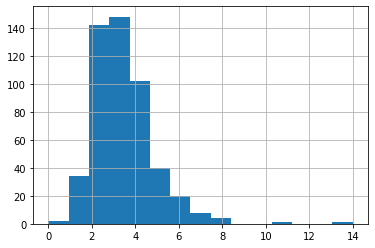

In [327]:
center_flats['rooms'].hist(bins = 15)

Compared to the general statistics, there are relatively few one-room apartments in the center, but the proportion of 4- and 5-room apartments is quite high.

Let's study the height of the ceilings in the center of St. Petersburg.

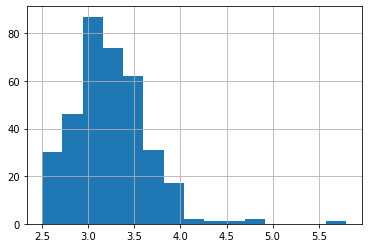

In [328]:
center_flats['ceiling_height'].hist(bins = 15)

In [329]:
center_flats['ceiling_height'].describe()

count   354.000
mean      3.232
std       0.408
min       2.500
25%       3.000
50%       3.200
75%       3.500
max       5.800
Name: ceiling_height, dtype: float64

The median ceiling height in the center of St. Petersburg is 3.2 meters, while throughout the region it is only 2.65 meters.
The graph clearly shows that apartments with a ceiling height of 3 meters prevail.

#### Conclusions
The median area of an apartment for sale in the center of St. Petersburg is 90 meters. This is significantly more than the median area for all apartments (52 meters).
Compared to the general statistics, there are relatively few one-room apartments in the center, but the proportion of 4- and 5-room apartments is quite high.
The median ceiling height in the center of St. Petersburg is 3.2 meters, while throughout the region it is only 2.65 meters.
Probably in the center of St. Petersburg there are a lot of old housing with high ceilings, and possibly new expensive ones.

### Studying the influence of various factors on the price in the center of St. Petersburg

Let's see what is the impact of the area of ​​the apartment on the price.

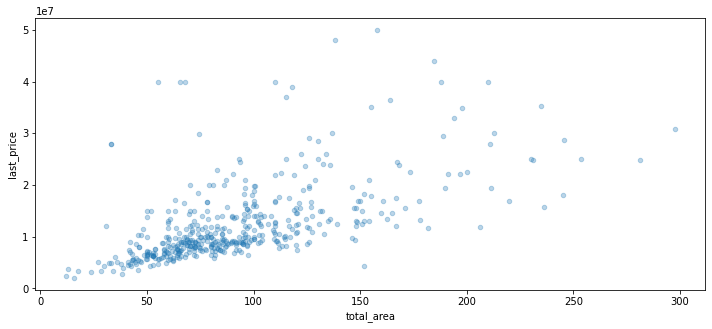

In [330]:
center_flats.query('total_area < 400 and last_price < 50000000').plot(x='total_area', y='last_price', kind='scatter', alpha=0.3, figsize = (12,5))

In [331]:
print(center_flats['total_area'].corr(center_flats['last_price']))

0.5597366235364178


The larger the area, the higher the price. The correlation is slightly less than for the entire region.

Let's see how the price depends on the number of rooms.

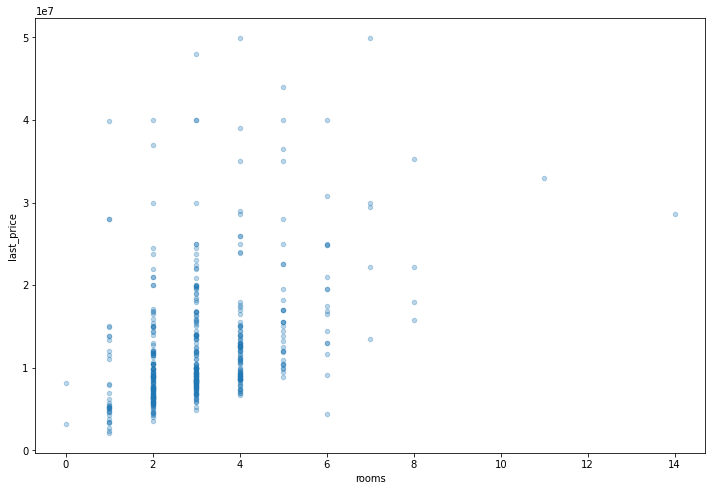

In [332]:
center_flats.query('last_price<50000000').plot(x='rooms', y='last_price', kind='scatter', alpha=0.3, figsize = (12,8))


In [333]:
print(center_flats['rooms'].corr(center_flats['last_price']))

0.2225955786215762


The price of apartments increases with the number of rooms, but the correlation is not very strong, and even less than for the entire region.

Let's see how the proximity to the center affects the price.

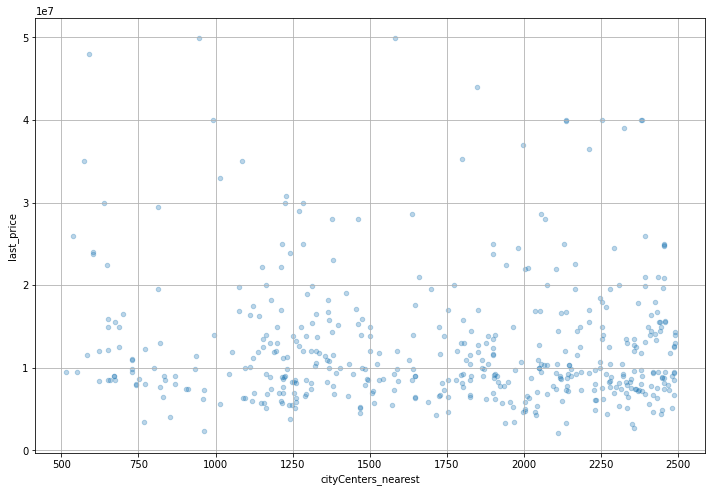

In [334]:
center_flats.query('last_price<50000000').plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3, figsize = (12,8),grid = True)


In [335]:
center_flats['cityCenters_nearest'].corr(center_flats['last_price'])

-0.036803611156452164

The correlation is quite weak - this confirms that the central zone is defined correctly. Any objects in this zone are in the same price category.

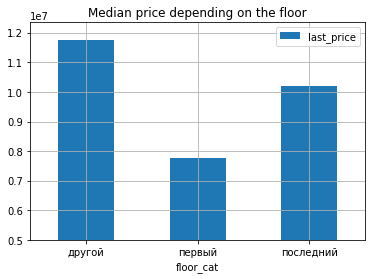

In [336]:
center_flats.pivot_table(index = 'floor_cat', values = 'last_price', aggfunc = 'median').plot(
    kind = 'bar', grid = True, rot = 0, ylim = 5000000,
    title = 'Median price depending on the floor')
plt.show()

The cheapest apartments are on the first floor, on the top floor they are somewhat more expensive, the most expensive ones are on the "other". The picture is practically no different from what we saw for the entire region.

Let's see how the day of the week of placement affects the price.

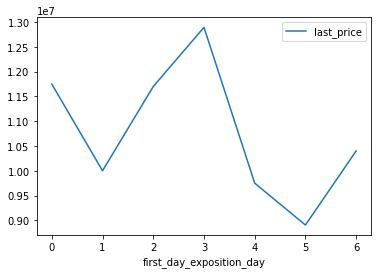

In [337]:
center_flats.pivot_table(index = 'first_day_exposition_day', values = 'last_price', aggfunc = 'median').plot()

There is no such obvious dependence as in the study of the entire region, but still the apartments are put up for sale on weekends a little cheaper.

Let's look at the dependence of the price on the month of the ad.

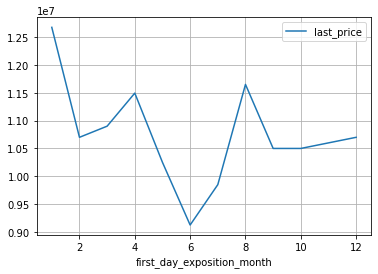

In [338]:
center_flats.pivot_table(index = 'first_day_exposition_month', values = 'last_price', aggfunc = 'median').plot(grid = True)

In general, the picture is similar to what we have seen for the entire region. From May to July, there is a drop in the median price. The maximum prices for apartments in the center - in January.

Let's look at the dependence of the price on the year of the announcement.

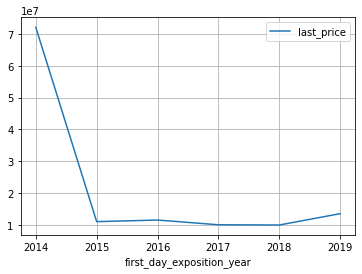

In [339]:
center_flats.pivot_table(index = 'first_day_exposition_year', values = 'last_price', aggfunc = 'median').plot(grid = True)

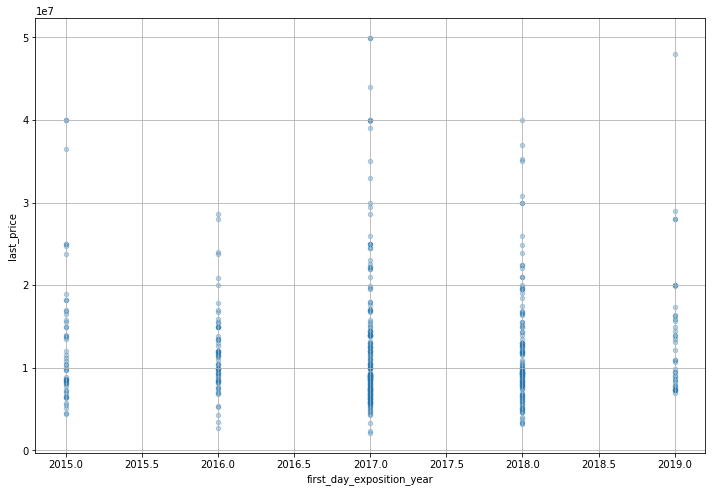

In [340]:
center_flats.query('last_price<50000000').plot(x='first_day_exposition_year', y='last_price', kind='scatter', alpha=0.3, figsize = (12,8),grid = True)


For apartments in the center, as well as for the entire region, there has been a sharp drop in prices after 2014. However, in 2014, there are very few announcements for the center of St. Petersburg, so if we considered only the center, then these data would be unreliable.

# General conclusion

+ We've built histograms for area, price, number of rooms, ceiling heights. Judging by the diagrams, the distribution of all values ​​looks realistic.  
+ We've analyzed the time of sale of the apartment. The median term for the sale of an apartment is 115 days. A fast sale can be considered a sale that took place in less than 46 days, and a long one - more than 261 days. At the same time, the alleged outliers were detected and removed: for a large number of ads, the placement period was specified as equal to 7, 14, 30, 45, 60, 90 days - it is likely that these ads did not sell, and the ads were removed from publication after the expiration of the standard term.  
+ The greatest influence on the price is the area of ​​​​the apartment and the floor (more expensive apartments, located not on the first and not on the last floor). The number of rooms and the distance to the center affect the price moderately.  
The price of objects placed on weekdays is noticeably higher than the price of objects placed on weekends. In May and June there is a decline in prices, while the peak is in April. After 2014, real estate prices fell sharply and remained at approximately the same level for the next 5 years.  
+ Of the 10 locations with the largest number of ads, the highest average price per square meter in St. Petersburg. The lowest is in Vyborg.  
+ The central zone of St. Petersburg was defined as a zone within a radius of 2 kilometers from the center.  
+ The median area of ​​an apartment for sale in the center of St. Petersburg is 90 meters. This is significantly more than the median area for all apartments (52 meters).  
Compared to the general statistics, there are relatively few one-room apartments in the center, but the proportion of 4- and 5-room apartments is quite high.  
The median ceiling height in the center of St. Petersburg is 3.2 meters, while throughout the region it is only 2.65 meters.  
+ In the center, the correlation of area and price is slightly less than for the entire region, the same can be said about the correlation of price with the number of rooms.  
The cheapest apartments in the center are on the first floor, on the last floor they are somewhat more expensive, the most expensive are on the "other". The picture is practically no different from what we saw for the entire region.